In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
#Lectura
data = pd.read_csv("customer_shopping_limpio.csv")

In [4]:
print(data.shape)
data.head()

(98553, 8)


,gender,age,category,quantity,price,payment_method,month,gasto_total
0,Female,28,Clothing,5,39.01040,Credit Card,8,195.05200
1,Male,21,Shoes,3,46.81326,Debit Card,12,140.43978
2,Male,20,Clothing,1,7.80208,Cash,11,7.80208
3,Female,66,Shoes,5,78.02210,Credit Card,5,390.11050
4,Female,53,Books,4,1.57560,Cash,10,6.30240


In [5]:
# Label Encoding solo para 'gender'
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender']) 

# Definir las columnas categóricas
columnas_categoricas = ['category', 'payment_method', 'month']

# Aplicar One-Hot Encoding
transformer = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop='first'), columnas_categoricas)],
    remainder='passthrough'  # Mantiene las columnas numéricas sin cambiar
)

# Aplicar la transformación
X = transformer.fit_transform(data)
# Verificar la forma de X
print("Shape of X after transformation:", X.shape)

# Convertir X de vuelta a una matriz densa si es un CSR (Compressed Sparse Row)
X_dense = X.toarray()

# Convertir X de vuelta a un DataFrame con los nombres adecuados de las columnas
ohe_columns = transformer.transformers_[0][1].get_feature_names_out(columnas_categoricas)

# Verificar cuántas columnas tenemos para One-Hot Encoding
print("Number of One-Hot encoded columns:", len(ohe_columns))

# Combinar las columnas One-Hot y las columnas numéricas
numerical_columns = ['gender', 'age','quantity','price','gasto_total']
print("Number of numerical columns:", len(numerical_columns))

# Asegúrate de que las columnas numéricas se añaden en el orden correcto
final_columns = list(ohe_columns) + numerical_columns
# Verificar el número total de columnas que estamos tratando de crear
print("Total number of columns in final_columns:", len(final_columns))
print(X)

X_df = pd.DataFrame(X_dense, columns=final_columns)

X_df.head()

Shape of X after transformation: (98553, 25)
Number of One-Hot encoded columns: 20
Number of numerical columns: 5
Total number of columns in final_columns: 25
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 669152 stored elements and shape (98553, 25)>
  Coords	Values
  (0, 0)	1.0
  (0, 7)	1.0
  (0, 15)	1.0
  (0, 21)	28.0
  (0, 22)	5.0
  (0, 23)	39.0104
  (0, 24)	195.052
  (1, 3)	1.0
  (1, 8)	1.0
  (1, 19)	1.0
  (1, 20)	1.0
  (1, 21)	21.0
  (1, 22)	3.0
  (1, 23)	46.81326
  (1, 24)	140.43977999999998
  (2, 0)	1.0
  (2, 18)	1.0
  (2, 20)	1.0
  (2, 21)	20.0
  (2, 22)	1.0
  (2, 23)	7.802079999999999
  (2, 24)	7.802079999999999
  (3, 3)	1.0
  (3, 7)	1.0
  (3, 12)	1.0
  :	:
  (98549, 22)	2.0
  (98549, 23)	0.27196
  (98549, 24)	0.5439200000000001
  (98550, 2)	1.0
  (98550, 8)	1.0
  (98550, 10)	1.0
  (98550, 20)	1.0
  (98550, 21)	63.0
  (98550, 22)	2.0
  (98550, 23)	0.27196
  (98550, 24)	0.5439200000000001
  (98551, 5)	1.0
  (98551, 10)	1.0
  (98551, 20)	1.0
  (98551, 21)	56.0
  

,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys,payment_method_Credit Card,payment_method_Debit Card,month_2,...,month_8,month_9,month_10,month_11,month_12,gender,age,quantity,price,gasto_total
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,28.0,5.0,39.01040,195.05200
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,21.0,3.0,46.81326,140.43978
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,20.0,1.0,7.80208,7.80208
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,66.0,5.0,78.02210,390.11050
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,53.0,4.0,1.57560,6.30240


In [6]:
X_numpy = X_df.values
print(type(X_numpy))  # Muestra <class 'numpy.ndarray'>
print(X_numpy.shape)  # Verifica las dimensiones

<class 'numpy.ndarray'>
(98553, 25)


 K-Means, es recomendable normalizar todas las variables, incluidas las categóricas que pasaron por One-Hot Encoding.
 K-Means usa distancias euclidianas para calcular la similitud entre puntos. Si las variables numéricas están normalizadas pero las categóricas One-Hot no, las categóricas (que son 0 o 1) pueden tener más peso en el cálculo de distancia, lo que podría sesgar los clusters.


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numpy)
#Verificamos los datos
print(X_scaled.min(axis=0), X_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [8]:
from sklearn.cluster import KMeans
# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print(clusters[:20])

[1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0]


C:\Users\carli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\carli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

In [9]:
clusters = kmeans.labels_.reshape(-1, 1)  # Convertimos a columna
data_segmentado = np.hstack((X_numpy, clusters))  # Agregar la columna de cluster

print(data_segmentado.shape)

(98553, 26)


In [10]:
columnas_originales = ["gender", "age", "category", "quantity", "price", "payment_method", "month", "gasto_total"]

df_original = pd.DataFrame(data, columns=columnas_originales)  # Datos sin codificar
df_original["cluster"] = clusters  # Añadimos la segmentación

print(df_original.head())  # Ver los primeros registros

   gender  age  category  quantity     price payment_method  month  \
0       0   28  Clothing         5  39.01040    Credit Card      8   
1       1   21     Shoes         3  46.81326     Debit Card     12   
2       1   20  Clothing         1   7.80208           Cash     11   
3       0   66     Shoes         5  78.02210    Credit Card      5   
4       0   53     Books         4   1.57560           Cash     10   

   gasto_total  cluster  
0    195.05200        1  
1    140.43978        0  
2      7.80208        1  
3    390.11050        0  
4      6.30240        1  


In [11]:
df_original["cluster"].value_counts()


cluster
1    50115
0    48438
Name: count, dtype: int64

In [12]:
df_original.groupby("cluster").mean(numeric_only=True)

,gender,age,quantity,price,month,gasto_total
cluster,,,,,,
0,0.636401,43.421240,3.003406,14.680451,6.106528,53.813573
1,0.177452,43.426499,3.003233,21.032213,6.121082,77.201570


In [13]:
df_original.groupby("cluster")["category"].value_counts()

cluster  category       
0        Food & Beverage    12905
         Cosmetics           9254
         Shoes               6171
         Toys                6137
         Clothing            4794
         Books               3081
         Souvenir            3053
         Technology          3043
1        Clothing           29147
         Cosmetics           5740
         Toys                3903
         Shoes               3807
         Technology          1940
         Souvenir            1936
         Books               1889
         Food & Beverage     1753
Name: count, dtype: int64

In [14]:
df_original.groupby("cluster")["month"].value_counts()

cluster  month
0        1        5696
         2        5116
         3        4187
         10       3820
         5        3773
         8        3766
         7        3764
         6        3754
         12       3724
         4        3654
         11       3637
         9        3547
1        1        5815
         2        5266
         3        4469
         7        4042
         12       3893
         10       3879
         11       3855
         5        3850
         8        3804
         6        3762
         4        3755
         9        3725
Name: count, dtype: int64

In [15]:
df_original.groupby("cluster")["payment_method"].value_counts()

cluster  payment_method
0        Credit Card       27573
         Cash              15570
         Debit Card         5295
1        Cash              28387
         Debit Card        14680
         Credit Card        7048
Name: count, dtype: int64

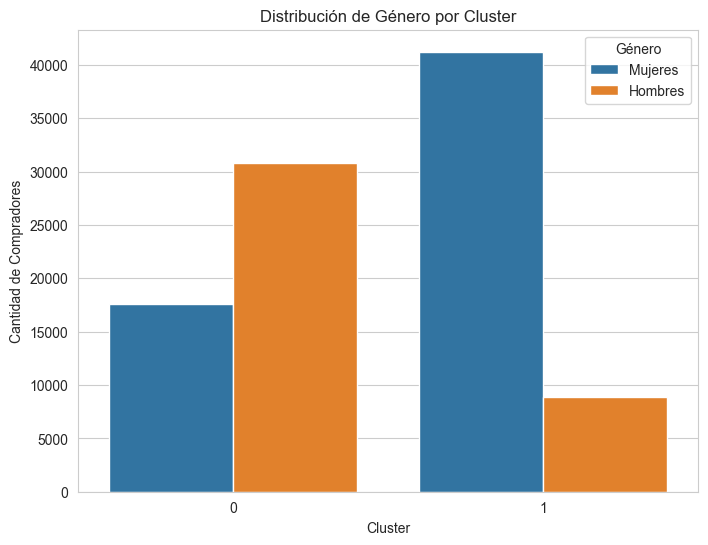

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set_style("whitegrid")

#Distribución de Género en cada Cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x="cluster", hue="gender", palette=["#1f77b4", "#ff7f0e"])
plt.title("Distribución de Género por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Compradores")
plt.legend(title="Género", labels=["Mujeres", "Hombres"])
plt.show()

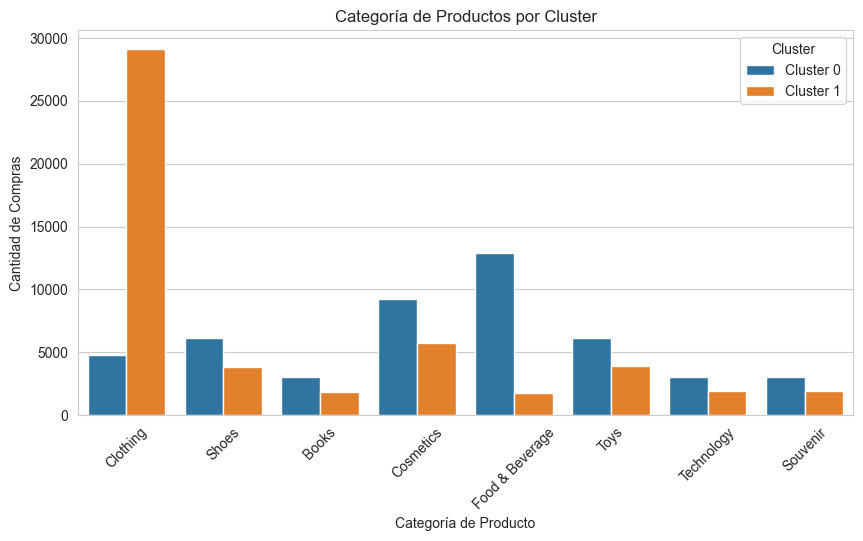

In [17]:
# Categoría de Productos más Comprados por Cluster
plt.figure(figsize=(10, 5))
sns.countplot(data=df_original, x="category", hue="cluster", palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Compras")
plt.title("Categoría de Productos por Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1"])
plt.show()


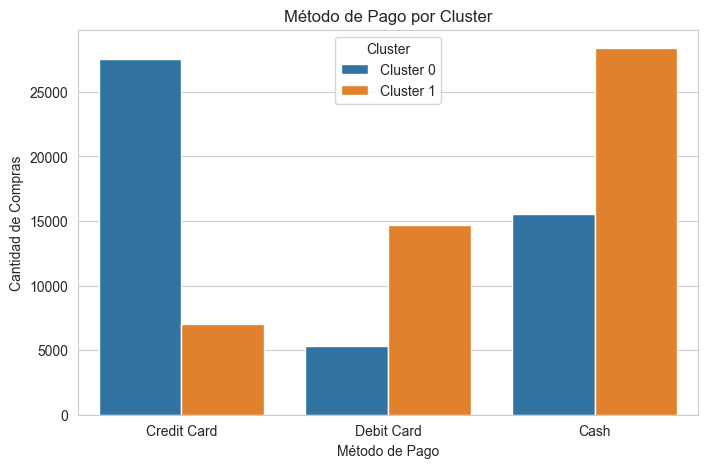

In [18]:
#Método de Pago por Cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df_original, x="payment_method", hue="cluster", palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.title("Método de Pago por Cluster")
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1"])
plt.show()

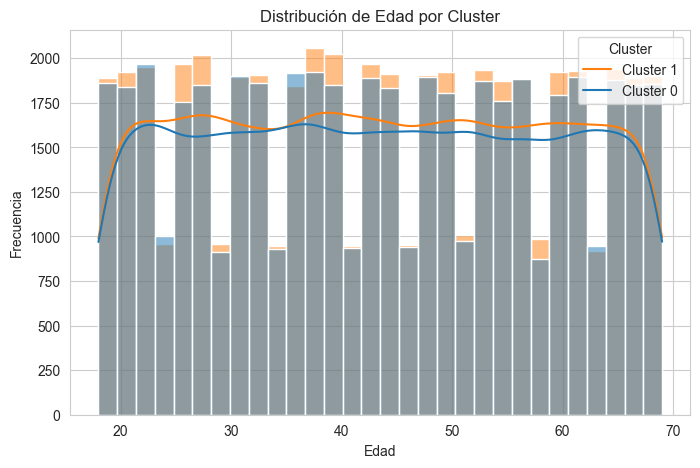

In [19]:
# Distribución de Edad por Cluster
plt.figure(figsize=(8, 5))
sns.histplot(data=df_original, x="age", hue="cluster", kde=True, bins=30, palette=["#1f77b4", "#ff7f0e"], alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edad por Cluster")
plt.legend(title="Cluster", labels=["Cluster 1", "Cluster 0"])
plt.show()

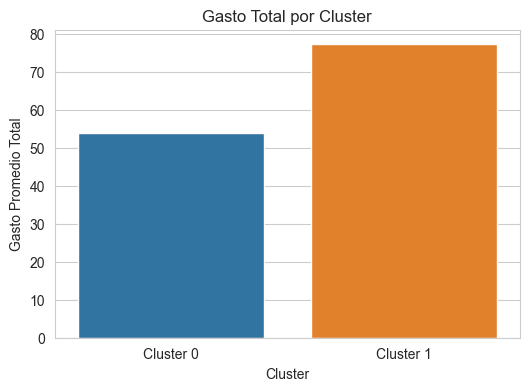

In [20]:
# Gasto Total por Cluster
plt.figure(figsize=(6, 4))
sns.barplot(data=df_original, x="cluster", y="gasto_total",hue="cluster", estimator=np.mean, errorbar=None, palette=["#1f77b4", "#ff7f0e"],legend=False)
plt.xlabel("Cluster")
plt.ylabel("Gasto Promedio Total")
plt.title("Gasto Total por Cluster")
plt.xticks([0, 1], ["Cluster 0", "Cluster 1"]) 
plt.show()

In [32]:
# Aplicar K-Means con 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print(clusters[:20])

[1 2 1 0 2 1 2 1 1 1 2 0 2 1 1 0 2 0 1 2]


In [33]:
clusters = kmeans.labels_.reshape(-1, 1)  # Convertimos a columna
data_segmentado = np.hstack((X_numpy, clusters))  # Agregar la columna de cluster

print(data_segmentado.shape)

(98553, 26)


In [34]:
columnas_originales = ["gender", "age", "category", "quantity", "price", "payment_method", "month", "gasto_total"]

df_original = pd.DataFrame(data, columns=columnas_originales)  # Datos sin codificar
df_original["cluster"] = clusters  # Añadimos la segmentación

print(df_original.head(20))  # Ver los primeros registros

    gender  age         category  quantity     price payment_method  month  \
0        0   28         Clothing         5  39.01040    Credit Card      8   
1        1   21            Shoes         3  46.81326     Debit Card     12   
2        1   20         Clothing         1   7.80208           Cash     11   
3        0   66            Shoes         5  78.02210    Credit Card      5   
4        0   53            Books         4   1.57560           Cash     10   
5        0   28         Clothing         5  39.01040    Credit Card      5   
6        0   49        Cosmetics         1   1.05716           Cash      3   
7        0   32         Clothing         2  15.60416    Credit Card      1   
8        1   69         Clothing         3  23.40624    Credit Card     11   
9        0   60         Clothing         2  15.60416    Credit Card      8   
10       0   36  Food & Beverage         2   0.27196           Cash     12   
11       0   29            Books         1   0.39390    Credit C

In [35]:
df_original["cluster"].value_counts()

cluster
2    41833
1    33941
0    22779
Name: count, dtype: int64

In [36]:
df_original.groupby("cluster").mean(numeric_only=True)

,gender,age,quantity,price,month,gasto_total
cluster,,,,,,
0,0.396857,43.428816,3.020018,15.112378,6.110584,55.438447
1,0.403259,43.390236,3.001591,23.418653,6.114846,85.893681
2,0.406187,43.448569,2.995625,14.964827,6.115005,54.919053


In [ ]:
df_original.groupby("cluster")["category"].value_counts()

cluster  category       
0        Cosmetics           5301
         Food & Beverage     5206
         Toys                3534
         Shoes               3533
         Souvenir            1763
         Technology          1750
         Books               1692
1        Clothing           33941
2        Cosmetics           9693
         Food & Beverage     9452
         Toys                6506
         Shoes               6445
         Books               3278
         Technology          3233
         Souvenir            3226
Name: count, dtype: int64

In [ ]:
df_original.groupby("cluster")["month"].value_counts()

cluster  month
0        1        2641
         2        2418
         3        1934
         8        1808
         6        1778
         5        1775
         7        1771
         12       1755
         4        1750
         10       1743
         9        1723
         11       1683
1        1        3899
         2        3604
         3        3028
         7        2803
         10       2636
         12       2623
         11       2609
         4        2593
         5        2588
         6        2543
         8        2508
         9        2507
2        1        4971
         2        4360
         3        3694
         10       3320
         5        3260
         8        3254
         12       3239
         7        3232
         11       3200
         6        3195
         4        3066
         9        3042
Name: count, dtype: int64

In [ ]:
df_original.groupby("cluster")["payment_method"].value_counts()

cluster  payment_method
0        Credit Card       22779
1        Cash              15158
         Credit Card       11842
         Debit Card         6941
2        Cash              28799
         Debit Card        13034
Name: count, dtype: int64

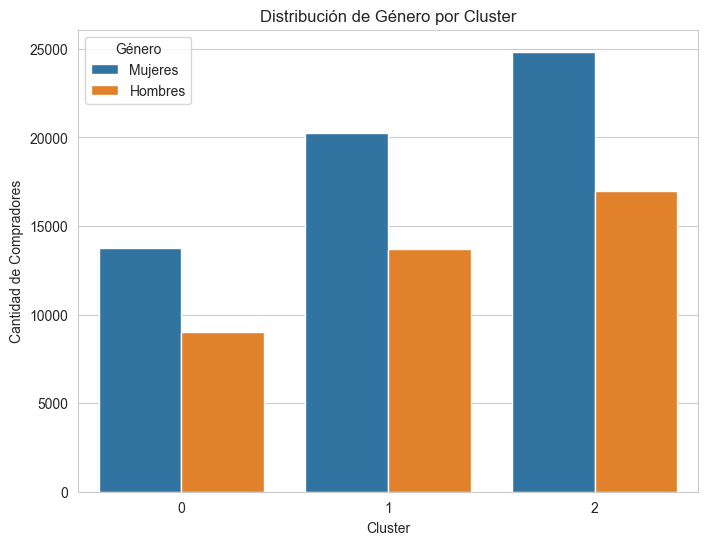

In [40]:
# Configuración de estilo
sns.set_style("whitegrid")

#Distribución de Género en cada Cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x="cluster", hue="gender", palette=["#1f77b4", "#ff7f0e"])
plt.title("Distribución de Género por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Compradores")
plt.legend(title="Género", labels=["Mujeres", "Hombres"])
plt.show()

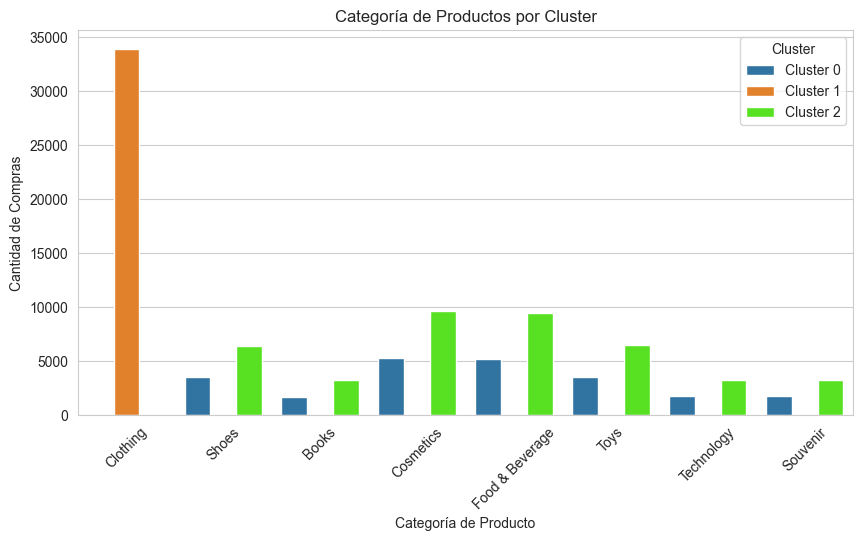

In [41]:
# Categoría de Productos más Comprados por Cluster
plt.figure(figsize=(10, 5))
sns.countplot(data=df_original, x="category", hue="cluster", palette=["#1f77b4", "#ff7f0e", "#4aff03"])
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Compras")
plt.title("Categoría de Productos por Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.show()

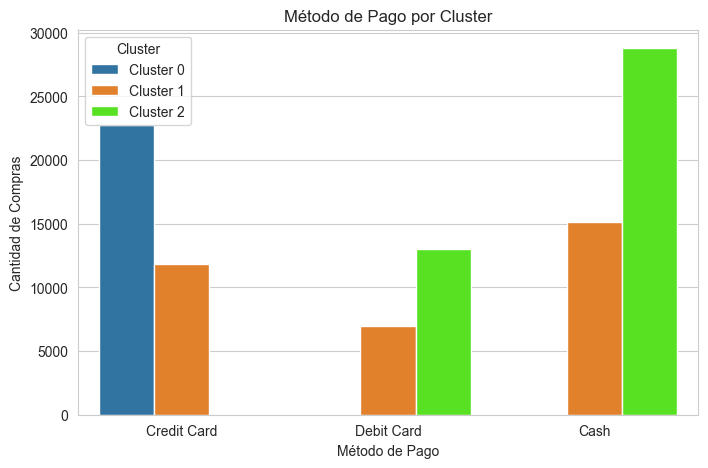

In [42]:
#Método de Pago por Cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df_original, x="payment_method", hue="cluster", palette=["#1f77b4", "#ff7f0e", "#4aff03"])
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.title("Método de Pago por Cluster")
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.show()

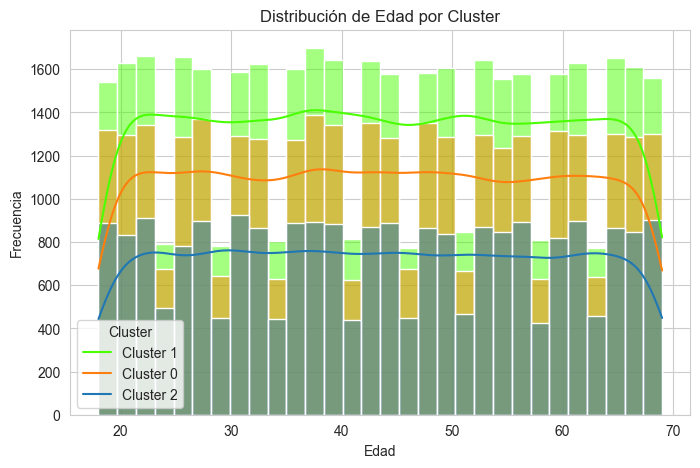

In [43]:
# Distribución de Edad por Cluster
plt.figure(figsize=(8, 5))
sns.histplot(data=df_original, x="age", hue="cluster", kde=True, bins=30, palette=["#1f77b4", "#ff7f0e", "#4aff03"], alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edad por Cluster")
plt.legend(title="Cluster", labels=["Cluster 1", "Cluster 0", "Cluster 2"])
plt.show()

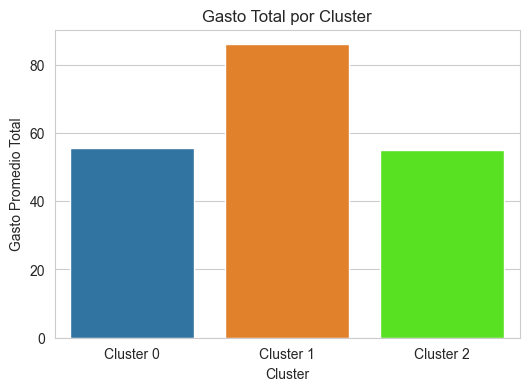

In [45]:
# Gasto Total por Cluster
plt.figure(figsize=(6, 4))
sns.barplot(data=df_original, x="cluster", y="gasto_total",hue="cluster", estimator=np.mean, errorbar=None, palette=["#1f77b4", "#ff7f0e", "#4aff03"],legend=False)
plt.xlabel("Cluster")
plt.ylabel("Gasto Promedio Total")
plt.title("Gasto Total por Cluster")
plt.xticks([0, 1, 2], ["Cluster 0", "Cluster 1", "Cluster 2"]) 
plt.show()

In [46]:
# Aplicar K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print(clusters[:20])

[1 2 1 0 2 1 3 1 1 1 2 0 2 1 1 0 2 0 1 2]


In [47]:
clusters = kmeans.labels_.reshape(-1, 1)  # Convertimos a columna
data_segmentado = np.hstack((X_numpy, clusters))  # Agregar la columna de cluster

print(data_segmentado.shape)

(98553, 26)


In [59]:
columnas_originales = ["gender", "age", "category", "quantity", "price", "payment_method", "month", "gasto_total"]

df_original = pd.DataFrame(data, columns=columnas_originales)  # Datos sin codificar
df_original["cluster"] = clusters  # Añadimos la segmentación

print(df_original.head(50))  # Ver los primeros registros

    gender  age         category  quantity      price payment_method  month  \
0        0   28         Clothing         5   39.01040    Credit Card      8   
1        1   21            Shoes         3   46.81326     Debit Card     12   
2        1   20         Clothing         1    7.80208           Cash     11   
3        0   66            Shoes         5   78.02210    Credit Card      5   
4        0   53            Books         4    1.57560           Cash     10   
5        0   28         Clothing         5   39.01040    Credit Card      5   
6        0   49        Cosmetics         1    1.05716           Cash      3   
7        0   32         Clothing         2   15.60416    Credit Card      1   
8        1   69         Clothing         3   23.40624    Credit Card     11   
9        0   60         Clothing         2   15.60416    Credit Card      8   
10       0   36  Food & Beverage         2    0.27196           Cash     12   
11       0   29            Books         1    0.3939

In [58]:
df_original["cluster"].value_counts()

cluster
1    33941
2    32140
0    17478
3    14994
Name: count, dtype: int64

In [49]:
df_original.groupby("cluster").mean(numeric_only=True)

,gender,age,quantity,price,month,gasto_total
cluster,,,,,,
0,0.400446,43.317485,3.011042,18.718093,6.112656,68.628774
1,0.403259,43.390236,3.001591,23.418653,6.114846,85.893681
2,0.405694,43.436839,2.997262,18.524670,6.112694,67.995655
3,0.399760,43.596505,3.011204,3.183325,6.115980,11.697150


In [50]:
df_original.groupby("cluster")["category"].value_counts()

cluster  category       
0        Food & Beverage     5206
         Toys                3534
         Shoes               3533
         Souvenir            1763
         Technology          1750
         Books               1692
1        Clothing           33941
2        Food & Beverage     9452
         Toys                6506
         Shoes               6445
         Books               3278
         Technology          3233
         Souvenir            3226
3        Cosmetics          14994
Name: count, dtype: int64

In [51]:
df_original.groupby("cluster")["month"].value_counts()

cluster  month
0        1        2015
         2        1868
         3        1461
         8        1401
         6        1383
         7        1374
         4        1358
         12       1358
         5        1345
         10       1329
         9        1305
         11       1281
1        1        3899
         2        3604
         3        3028
         7        2803
         10       2636
         12       2623
         11       2609
         4        2593
         5        2588
         6        2543
         8        2508
         9        2507
2        1        3796
         2        3365
         3        2845
         5        2553
         10       2544
         7        2499
         8        2494
         12       2488
         11       2456
         6        2402
         4        2363
         9        2335
3        1        1801
         2        1545
         3        1322
         10       1190
         6        1188
         8        1167
         12       1

In [52]:
df_original.groupby("cluster")["payment_method"].value_counts()

cluster  payment_method
0        Credit Card       17478
1        Cash              15158
         Credit Card       11842
         Debit Card         6941
2        Cash              22182
         Debit Card         9958
3        Cash               6617
         Credit Card        5301
         Debit Card         3076
Name: count, dtype: int64

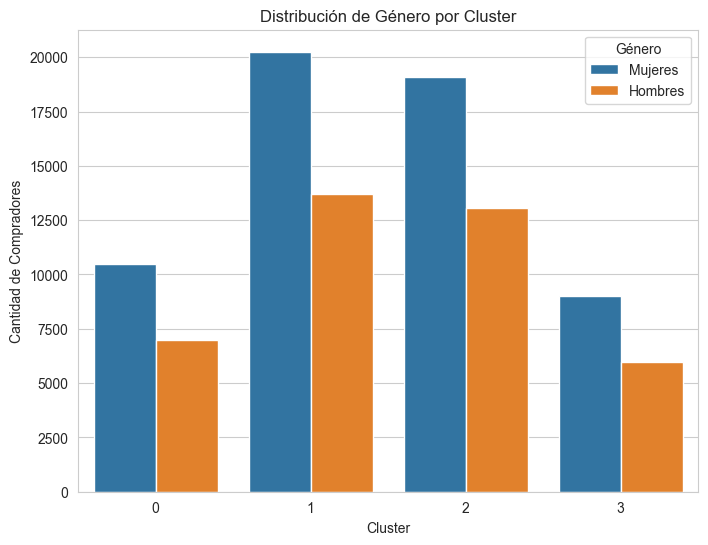

In [53]:
# Configuración de estilo
sns.set_style("whitegrid")

#Distribución de Género en cada Cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x="cluster", hue="gender", palette=["#1f77b4", "#ff7f0e"])
plt.title("Distribución de Género por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Compradores")
plt.legend(title="Género", labels=["Mujeres", "Hombres"])
plt.show()

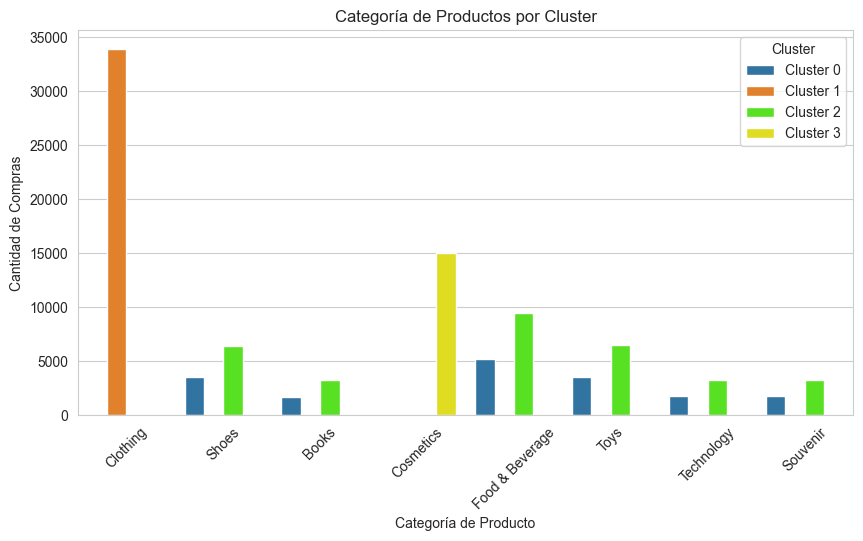

In [54]:
# Categoría de Productos más Comprados por Cluster
plt.figure(figsize=(10, 5))
sns.countplot(data=df_original, x="category", hue="cluster", palette=["#1f77b4", "#ff7f0e", "#4aff03", "#fffb03"])
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Compras")
plt.title("Categoría de Productos por Cluster")
plt.xticks(rotation=45)
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
plt.show()

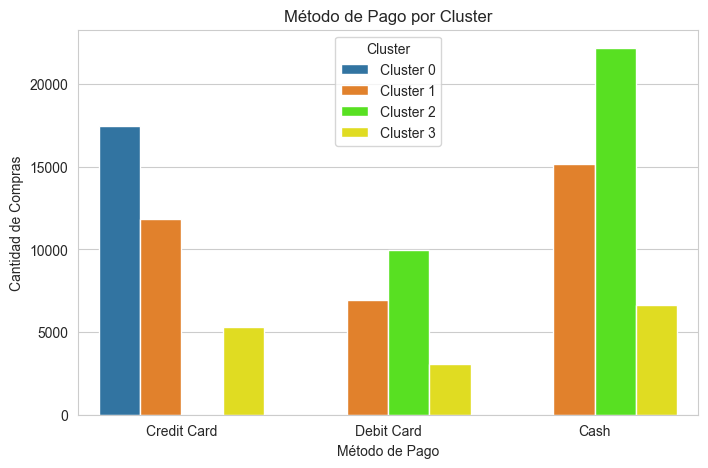

In [55]:
#Método de Pago por Cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df_original, x="payment_method", hue="cluster", palette=["#1f77b4", "#ff7f0e", "#4aff03", "#fffb03"])
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.title("Método de Pago por Cluster")
plt.legend(title="Cluster", labels=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
plt.show()

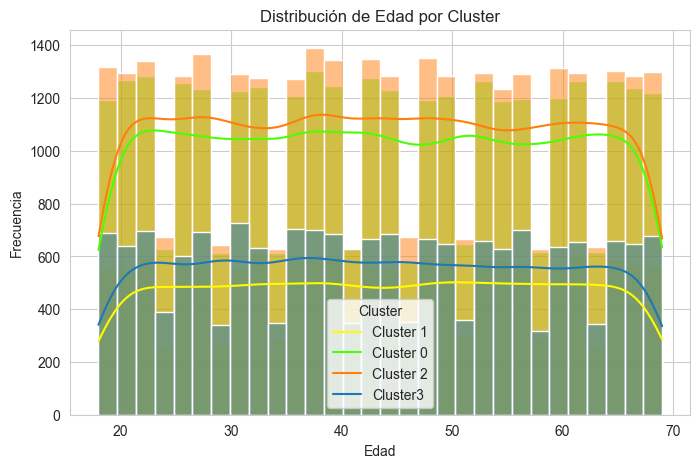

In [56]:
# Distribución de Edad por Cluster
plt.figure(figsize=(8, 5))
sns.histplot(data=df_original, x="age", hue="cluster", kde=True, bins=30, palette=["#1f77b4", "#ff7f0e", "#4aff03", "#fffb03"], alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edad por Cluster")
plt.legend(title="Cluster", labels=["Cluster 1", "Cluster 0", "Cluster 2", "Cluster3"])
plt.show()

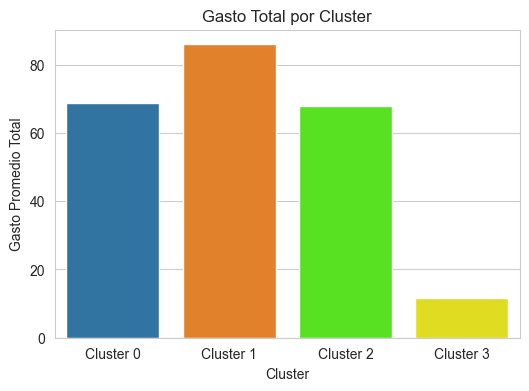

In [57]:
# Gasto Total por Cluster
plt.figure(figsize=(6, 4))
sns.barplot(data=df_original, x="cluster", y="gasto_total",hue="cluster", estimator=np.mean, errorbar=None, palette=["#1f77b4", "#ff7f0e", "#4aff03", "#fffb03"],legend=False)
plt.xlabel("Cluster")
plt.ylabel("Gasto Promedio Total")
plt.title("Gasto Total por Cluster")
plt.xticks([0, 1, 2, 3], ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]) 
plt.show()